# Visualization

In [1]:
from sklearn.manifold import TSNE
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import os

In [2]:
data_file_path = os.path.abspath(os.path.join(os.pardir,'data','bag_of_words_training_data.csv'))
bag_of_words = pd.read_csv(data_file_path)
bag_of_words.head()

News Category  access  according  accused  acquisition  across  action  \
0      business       0          0        0            0       0       0   
1      business       0          0        0            0       0       0   
2      business       0          0        0            0       0       0   
3      business       0          0        0            0       0       0   
4      business       0          0        0            0       0       0   

   activity  ad  add  ...  yahoo  yankee  yard  yasser  year  yesterday  yet  \
0         0   0    0  ...      0       0     0       0     0          0    0   
1         0   0    0  ...      0       0     0       0     0          0    0   
2         0   0    0  ...      0       0     0       0     0          0    0   
3         0   0    0  ...      0       0     0       0     0          0    0   
4         0   0    0  ...      0       0     0       0     0          0    0   

   york  young  yukos  
0     0      0      0  
1     0      0      0  
2     0      0      0  
3     0      0      0  
4     0      0      0  

[5 rows x 1001 columns]

# Word Cloud

In [153]:
#group of dataframes by news category
news_category_bow = bag_of_words.groupby('News Category')

In [154]:
#creates dict of pd series with top 200 most frequent words by news category
top_n = 200
freq_by_cat = {}
news_categories = []
for name, group in news_category_bow:
    news_categories.append(name)
    freq_by_cat[name] = news_category_bow.get_group(name).sum().drop('News Category').astype(int).nlargest(n = top_n)

In [119]:
freq_by_cat

{'business': reuters     9204
 said        7781
 two         7506
 new         7056
 one         6863
             ... 
 home         753
 computer     751
 make         749
 wireless     748
 nation       745
 Length: 200, dtype: int64, 'science_and_technology': two          8078
 new          7607
 one          6126
 microsoft    5510
 hundred      5331
              ... 
 storage       654
 life          652
 quarter       649
 feature       644
 largest       644
 Length: 200, dtype: int64, 'sports': one         11499
 two         10608
 ap           6662
 three        6446
 game         6301
             ...  
 fourteen      616
 miss          616
 spain         616
 thirteen      611
 move          610
 Length: 200, dtype: int64, 'world': said          8227
 two           6847
 iraq          6233
 ap            6186
 reuters       5765
               ... 
 australian     682
 accused        681
 western        678
 power          669
 terrorism      664
 Length: 200, dtype: int64

In [211]:
#title dimension for word cloud
title_dic = {'fontsize': 250,
 'fontweight' : 5,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

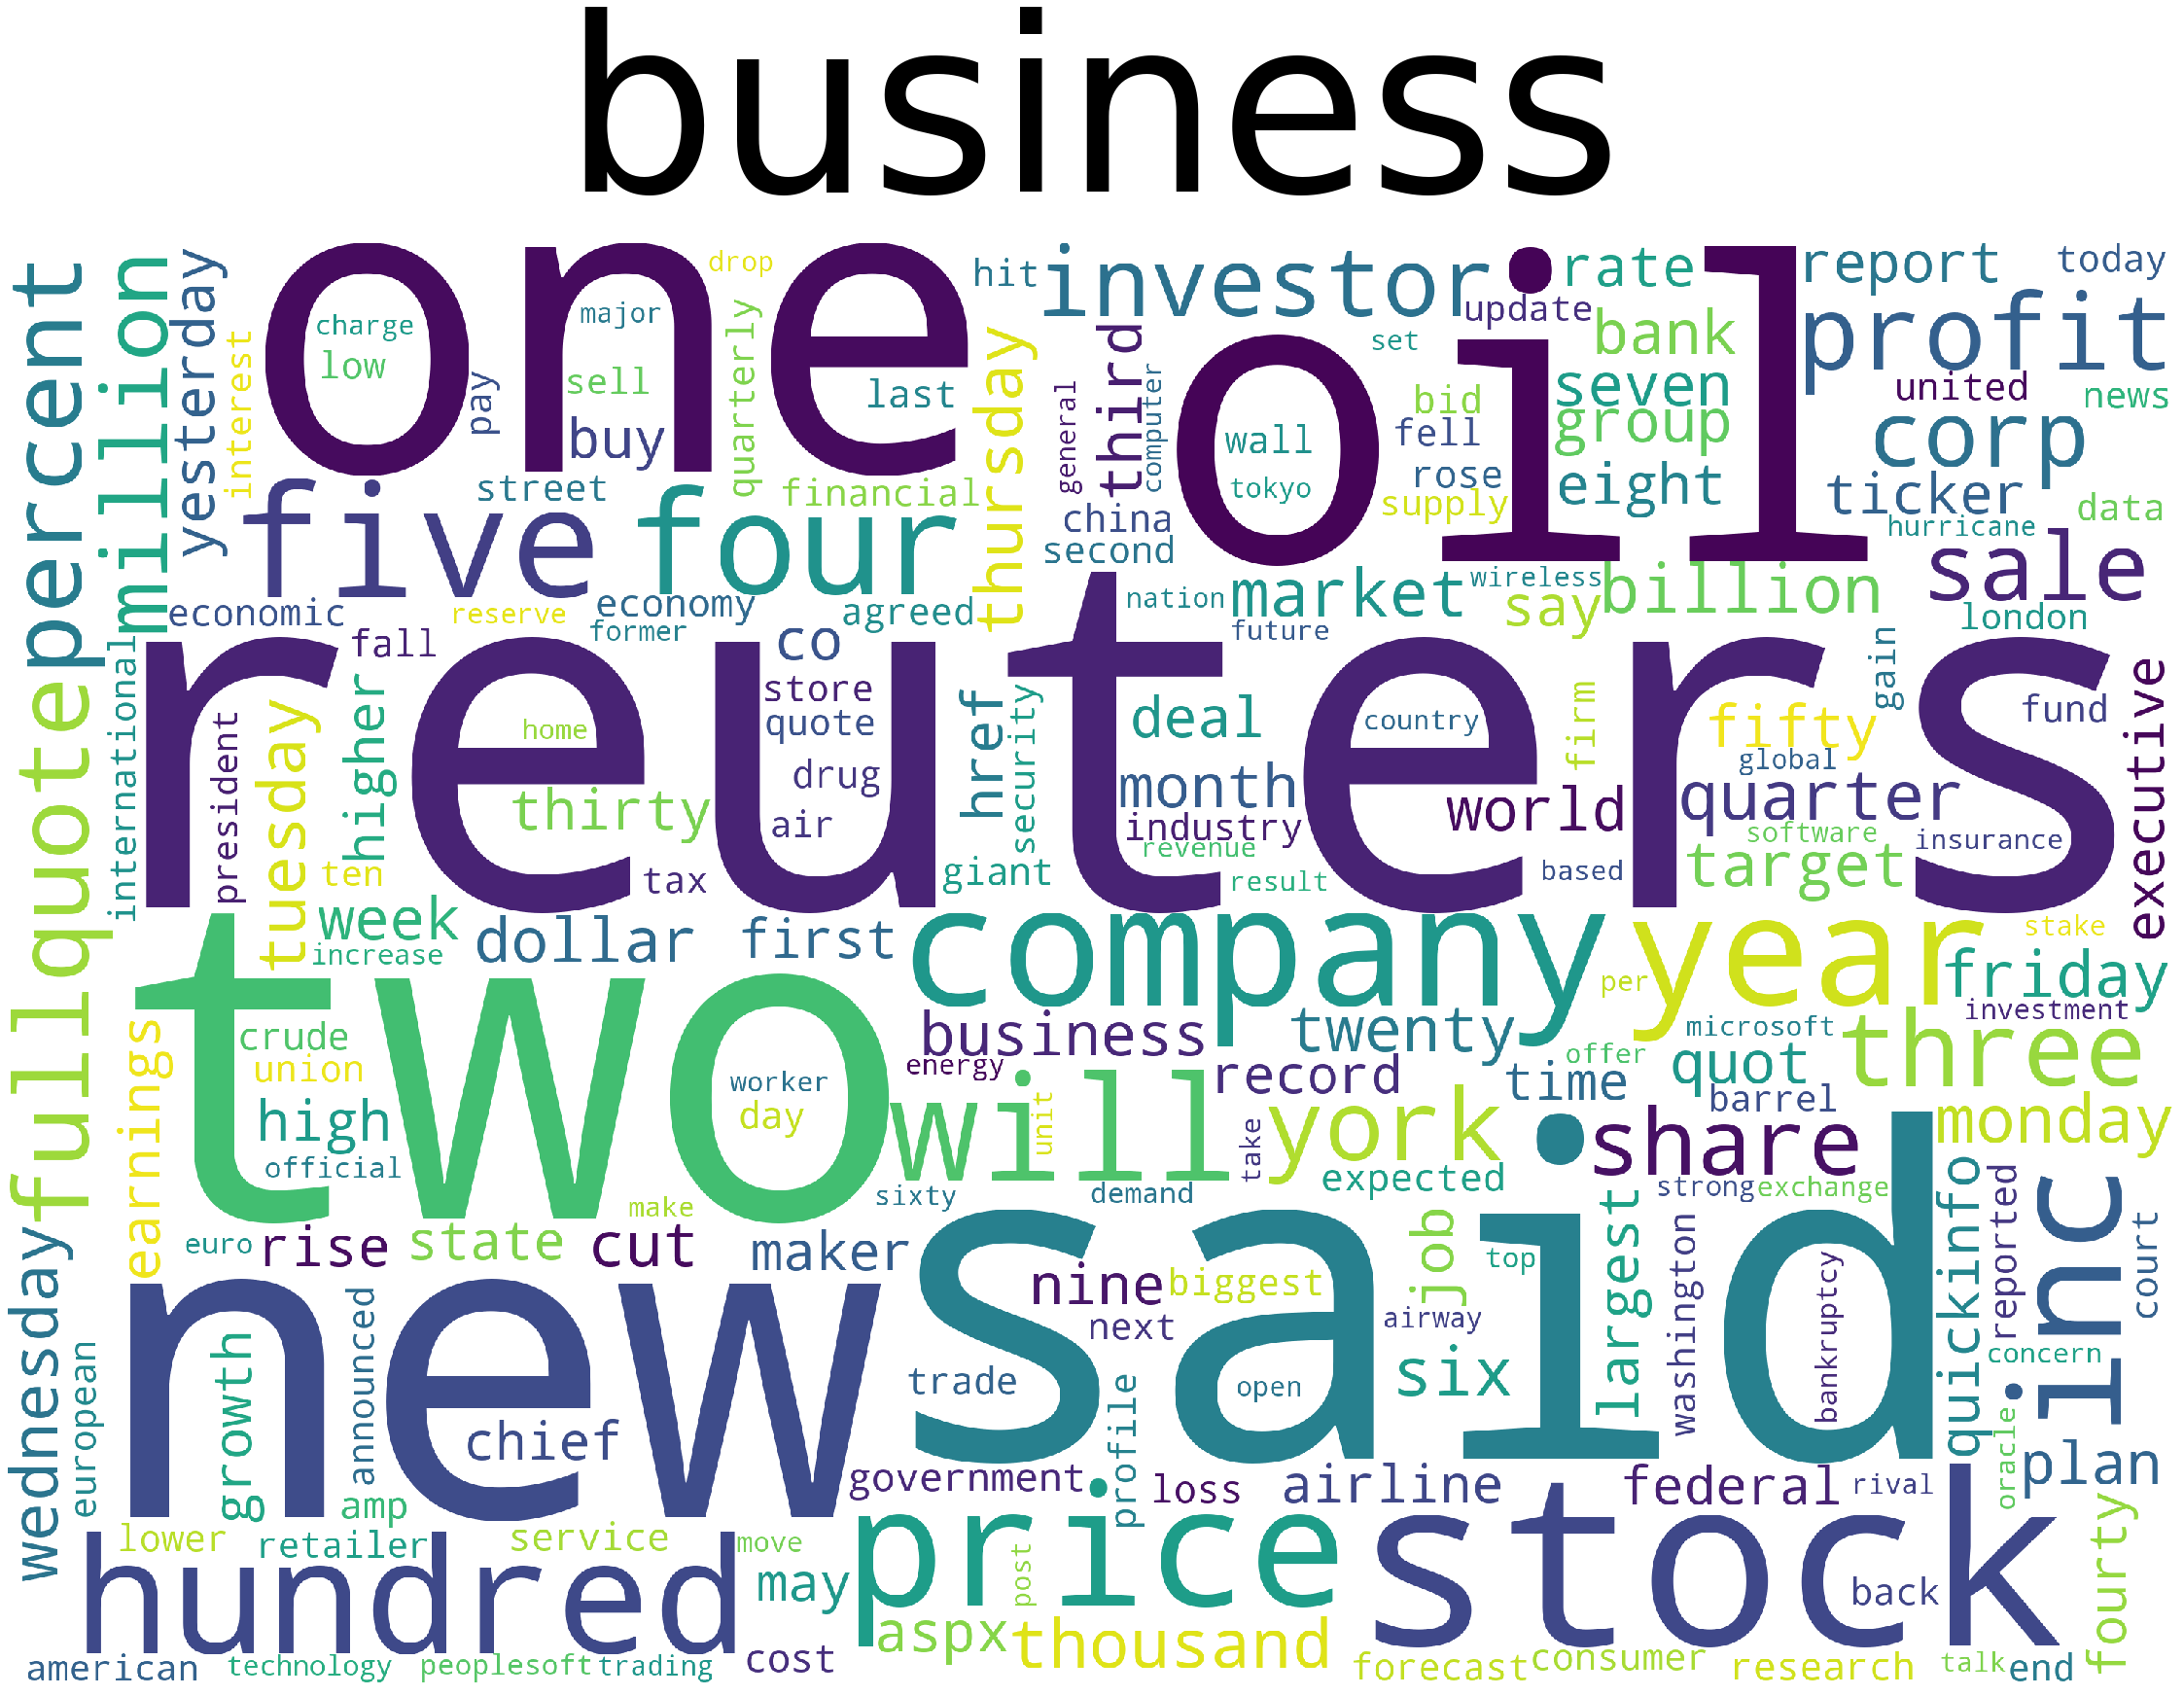

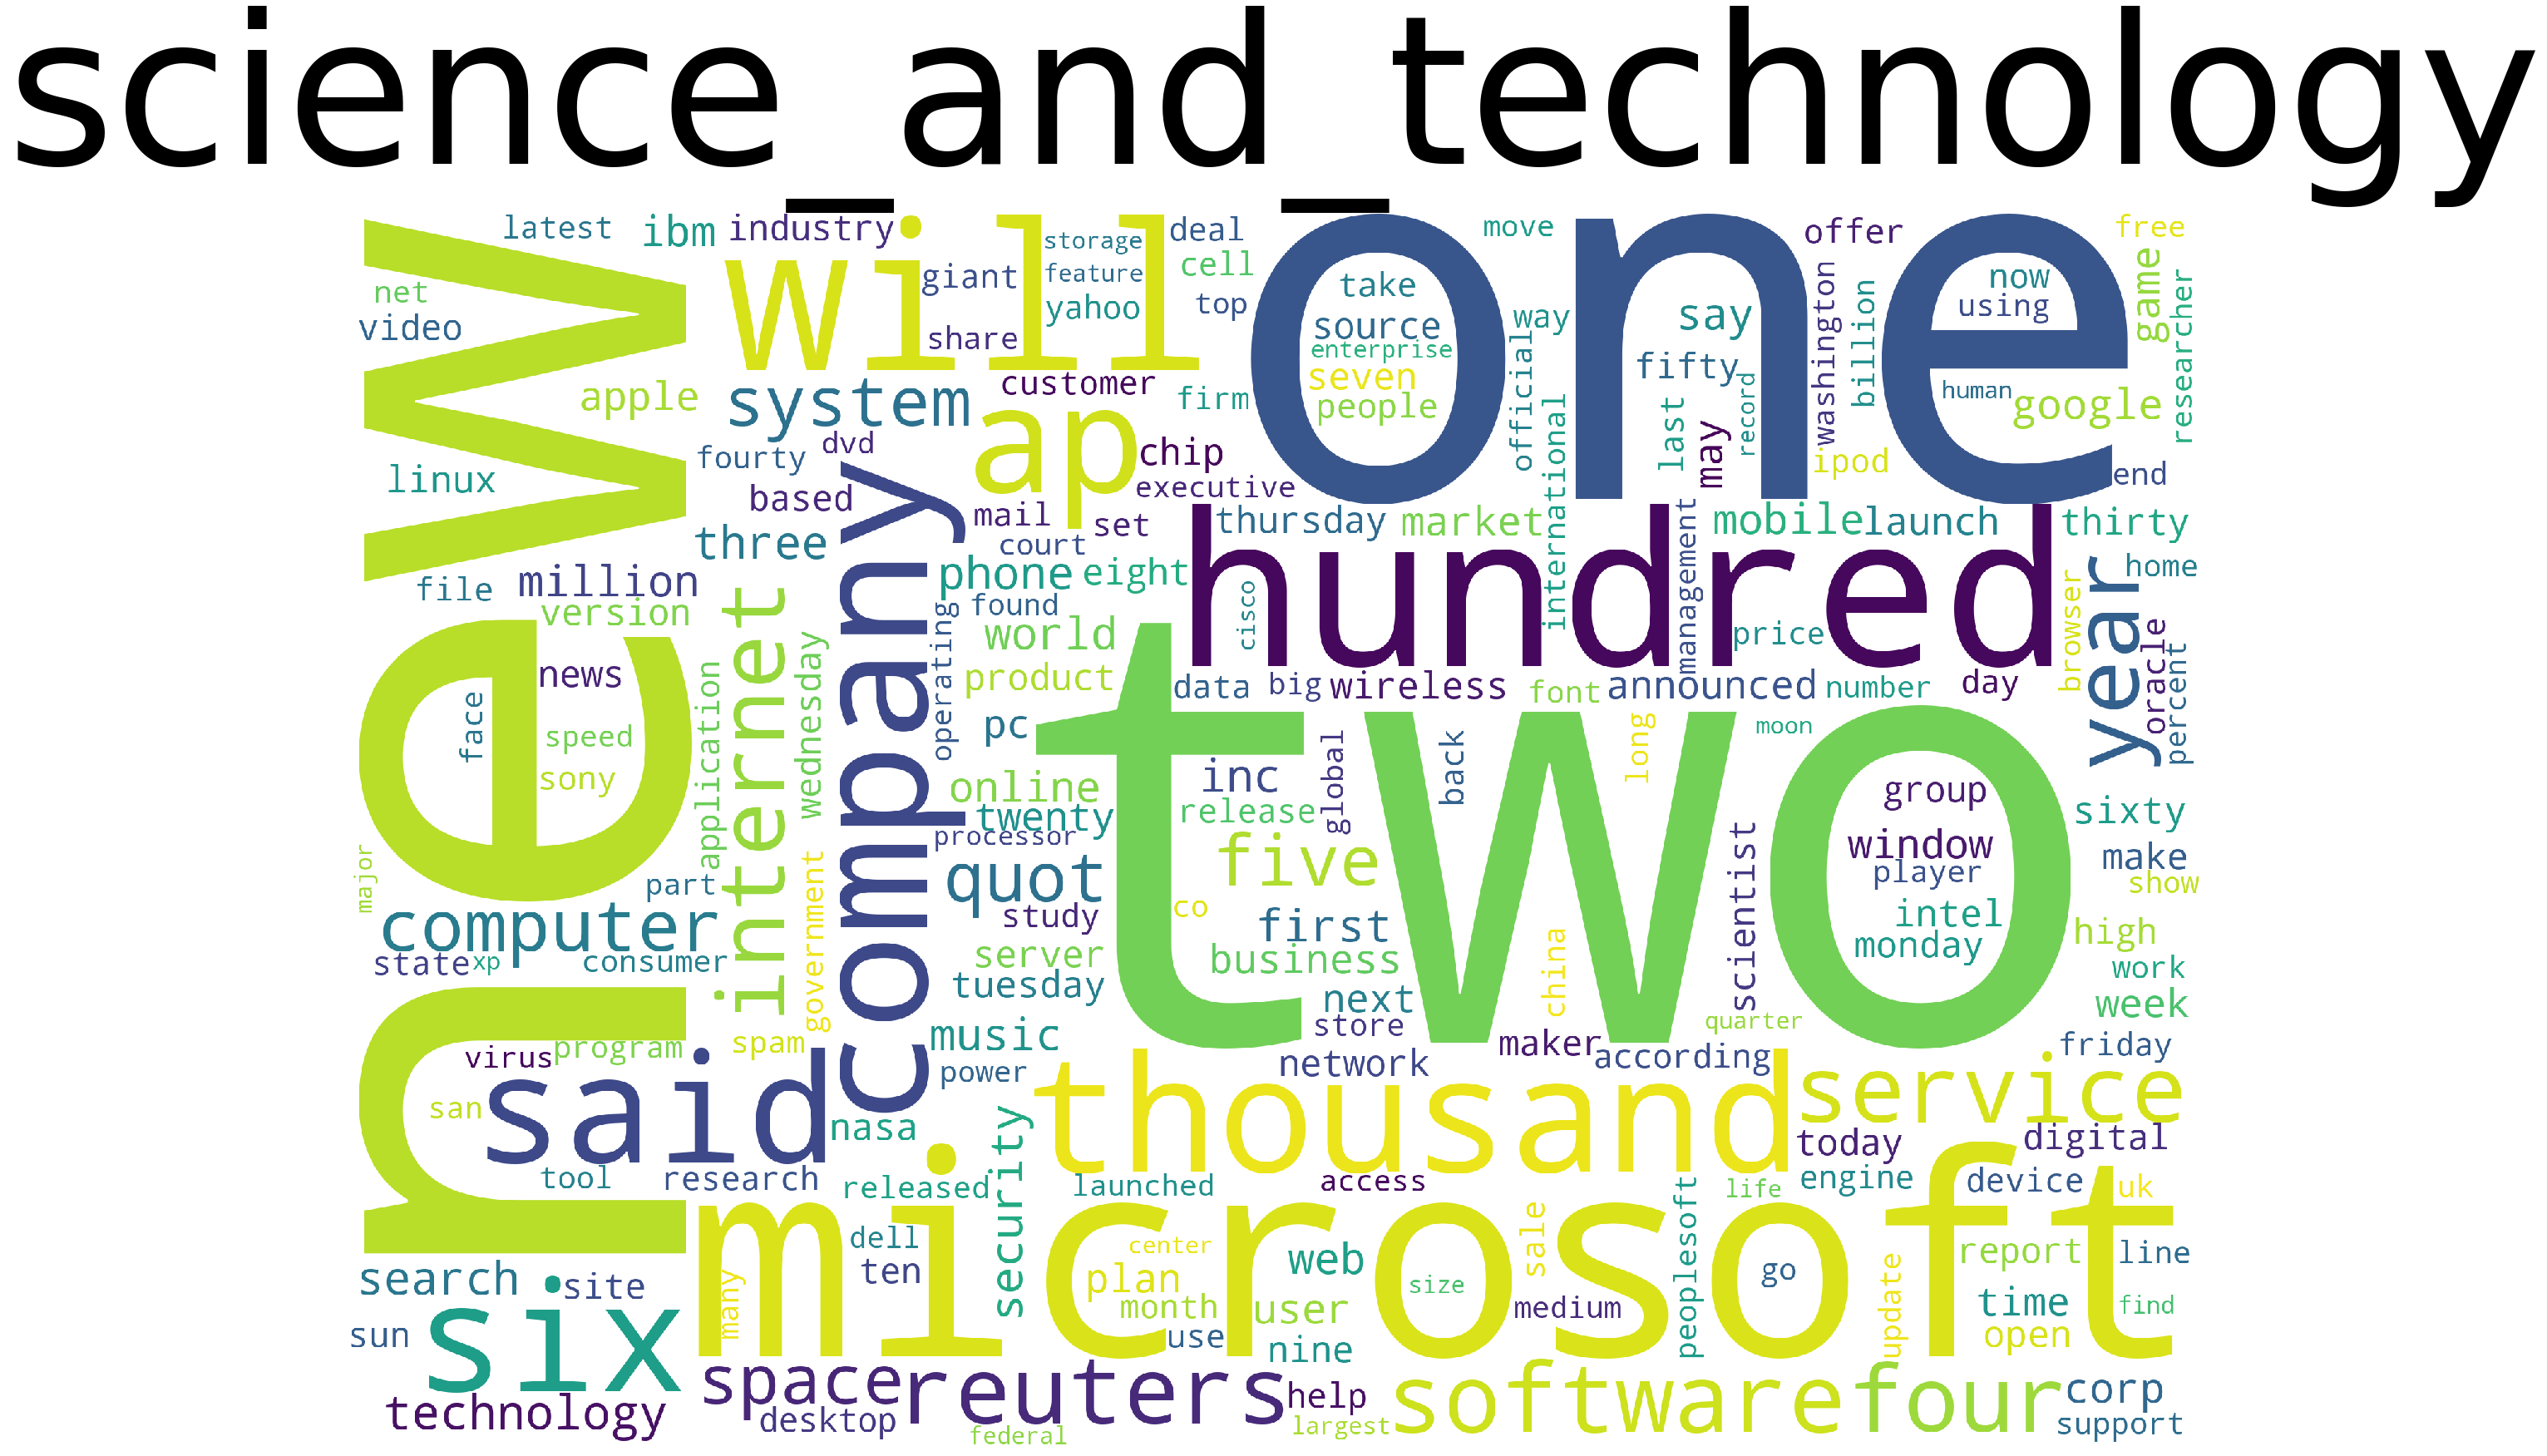

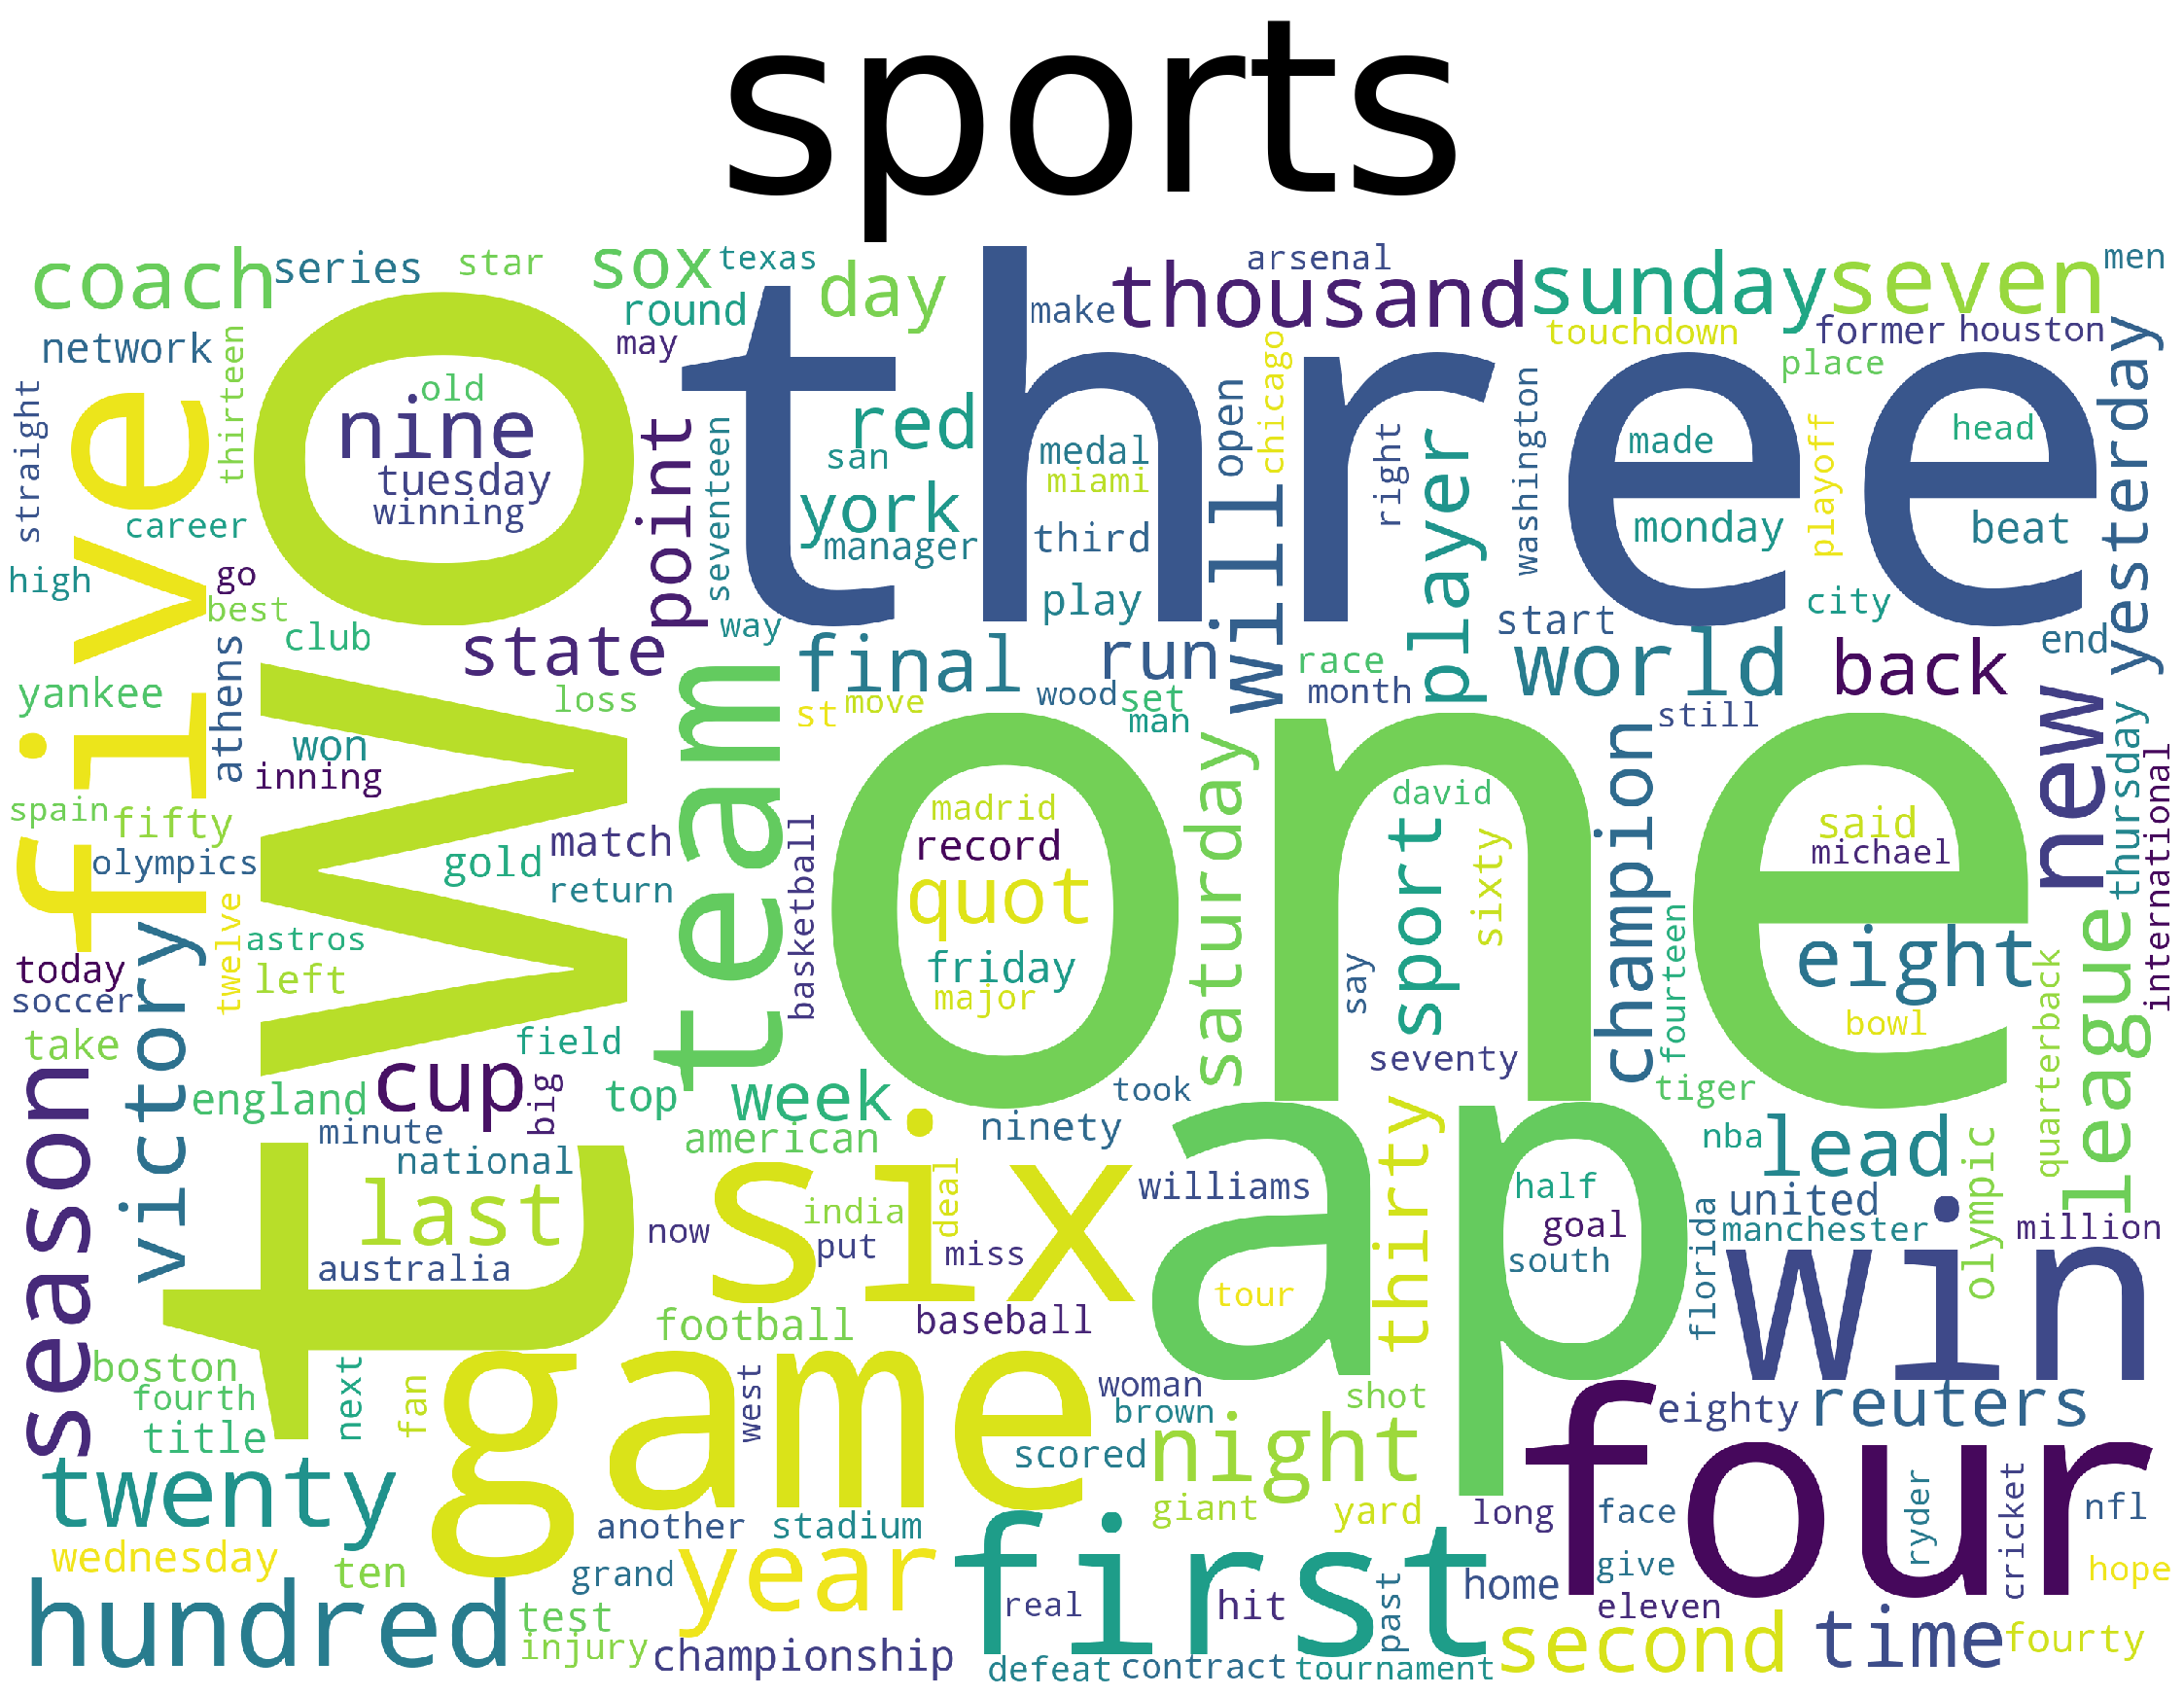

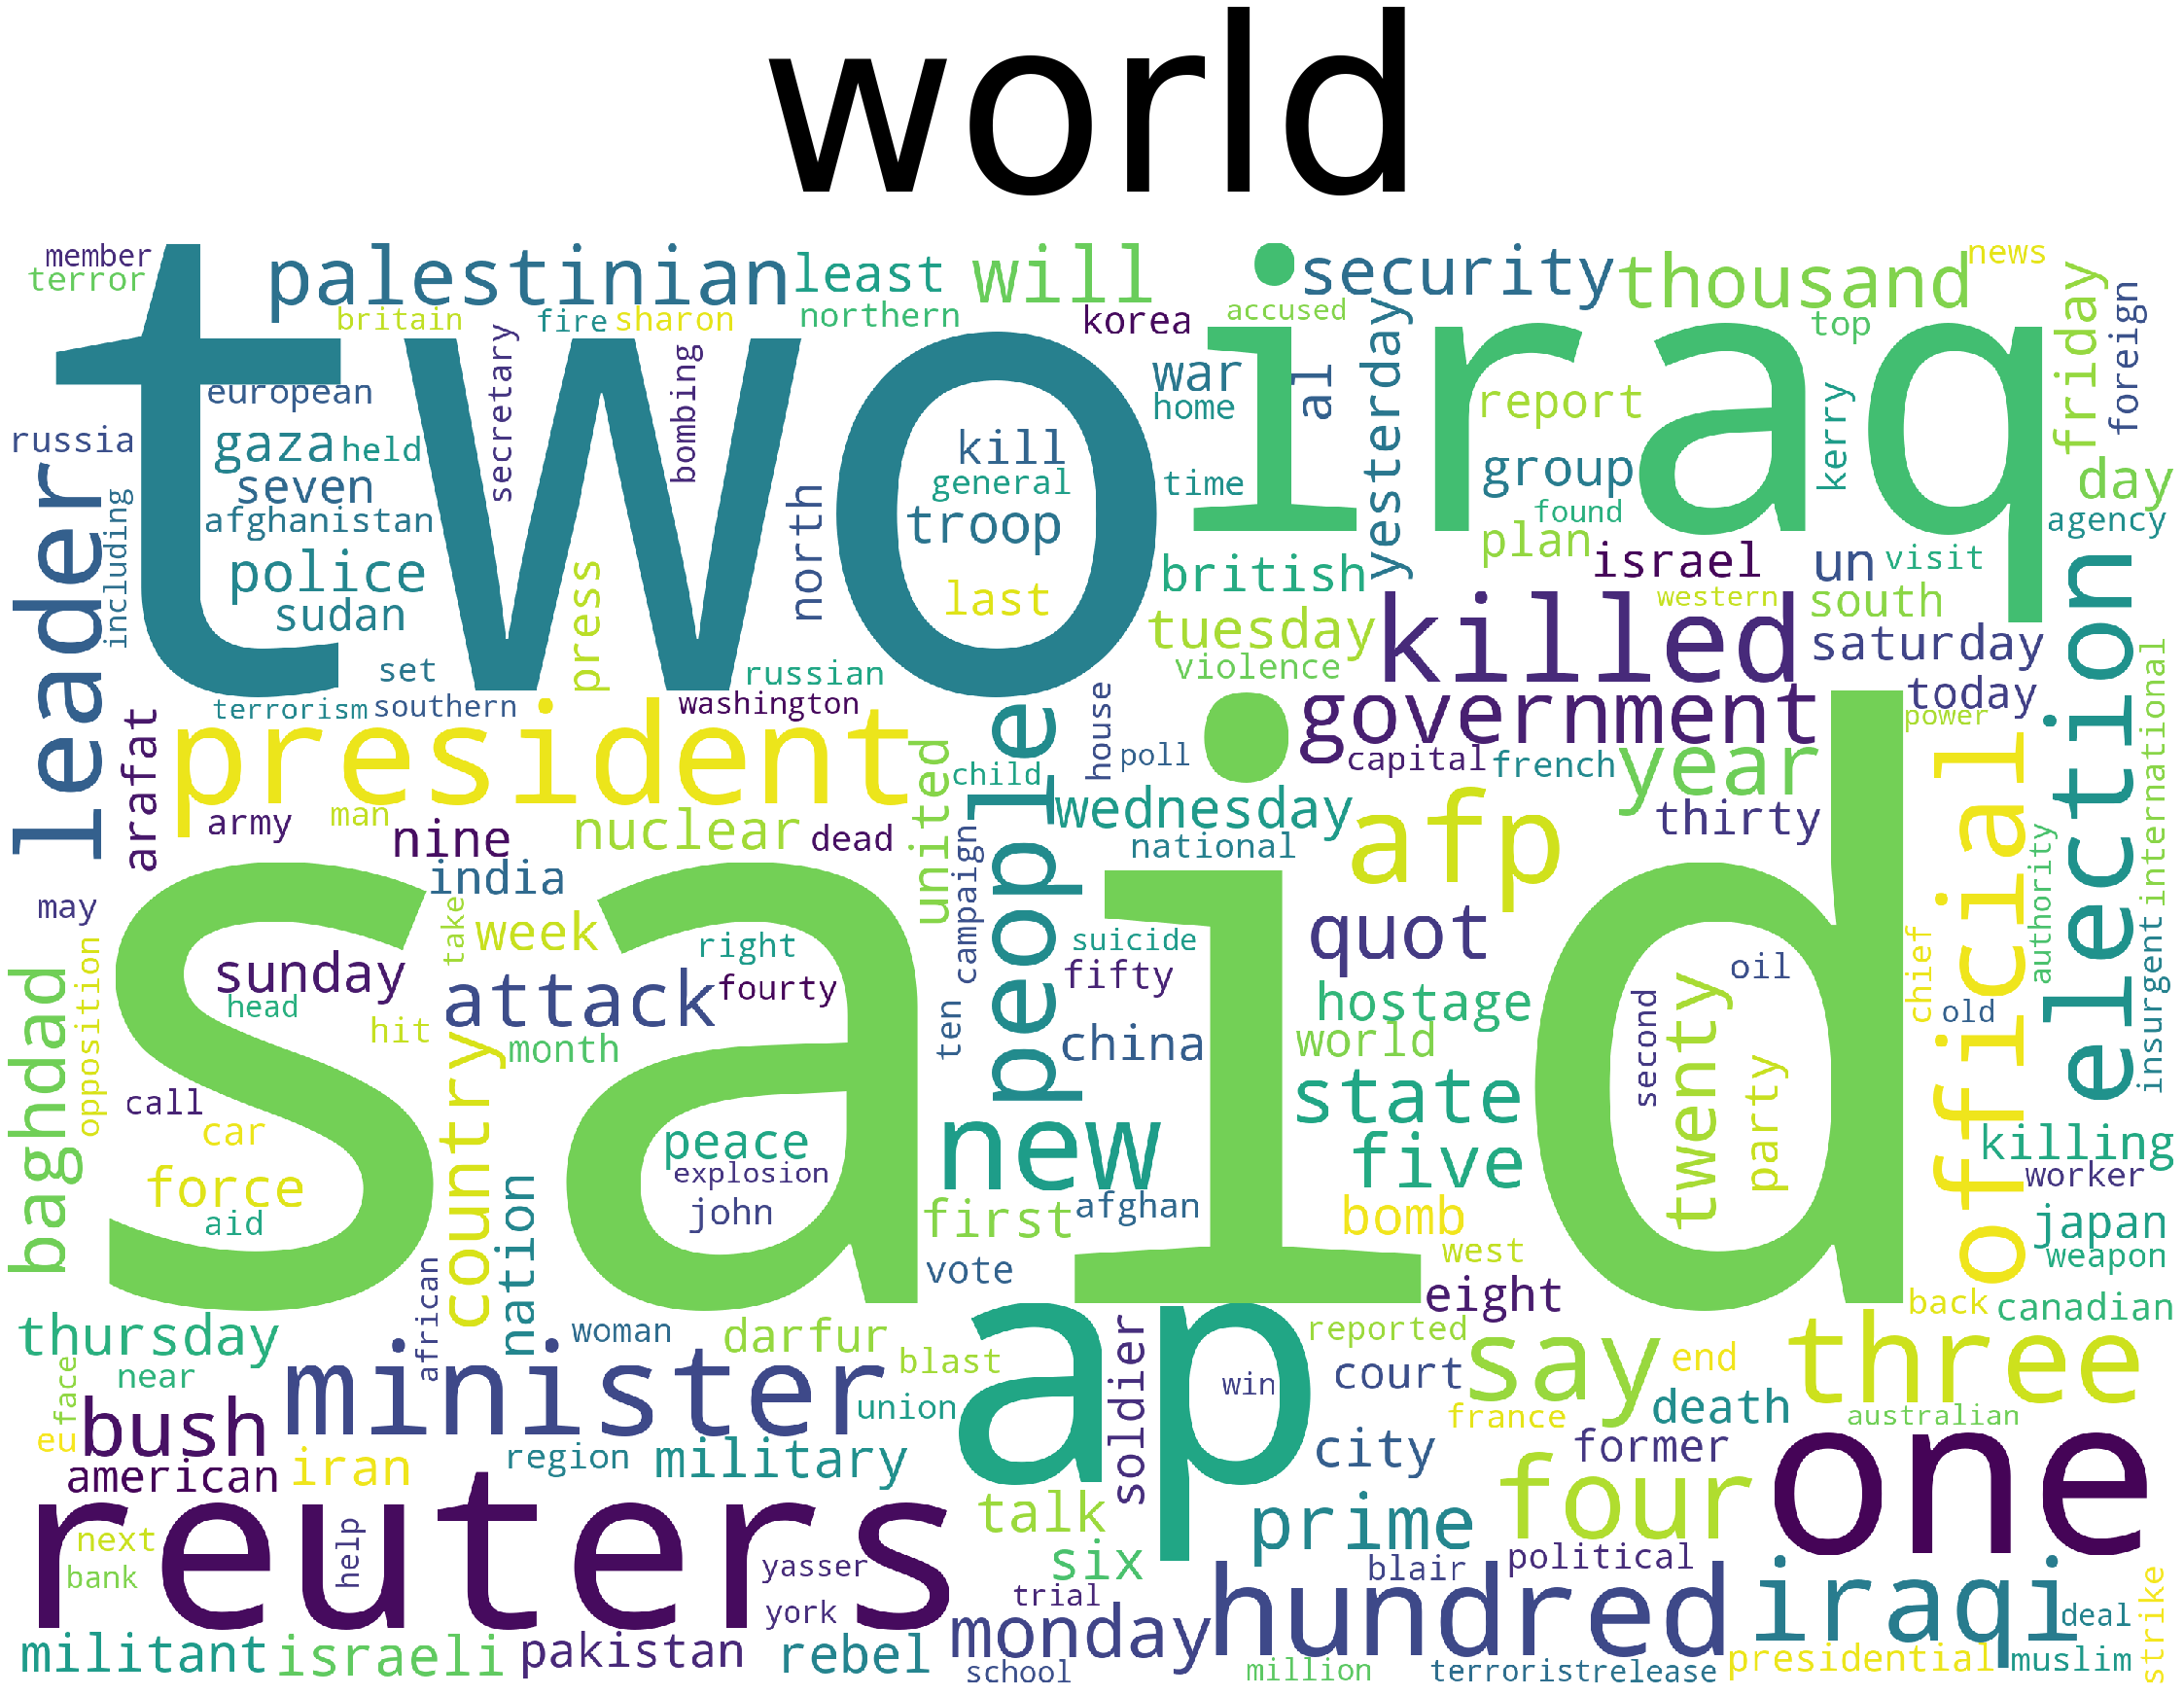

In [214]:
#create a word cloud for each news category and save as png
for category in news_categories:
    text = freq_by_cat[category]
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate_from_frequencies(text)
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(category, fontdict = title_dic)
    image_file_path = os.path.abspath(os.path.join(os.pardir,'images','{}_bow_word_cloud.png'.format(category)))
    plt.savefig(image_file_path, bbox_inches='tight')
    plt.show()

# TSNE

In [171]:
#sample 12000 for tsne
sample = bag_of_words.sample(n=12000)
transform_me = sample.drop('News Category', axis=1)

In [176]:
#fit tsne model on sample data
tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32, verbose = 1)
t = tsne_model.fit_transform(transform_me)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.012s...
[t-SNE] Computed neighbors for 12000 samples in 5.658s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.927857
[t-SNE] KL divergence

In [213]:
#title dimension for pyplot
title_dic_tsne = {'fontsize': 50,
 'fontweight' : 5,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

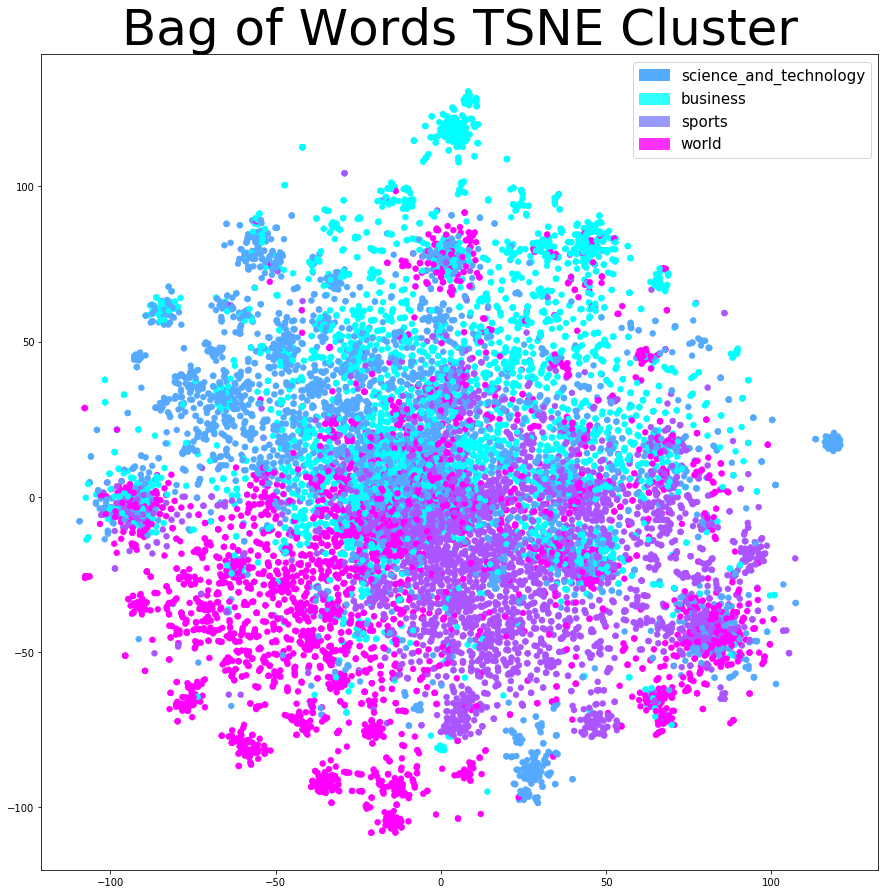

In [217]:
# teal 0  business
# blue 1 sci
# purple 2 sports
# pink 3 world

cat_colors = pd.Categorical(sample['News Category']).codes
sc = plt.scatter(t[:,0], t[:,1], c=cat_colors, cmap=cm.cool, linewidths=0.4)
business_patch = Patch(color='#30ffff', label='business')
snt_patch = Patch(color='#54AAFC', label='science_and_technology')
sports_patch = Patch(color='#9898FF', label='sports')
world_patch = Patch(color='#ff30ff', label='world')
plt.legend(handles=[snt_patch, business_patch, sports_patch, world_patch], fontsize = 15)
plt.gcf().set_size_inches((15, 15))
plt.title('Bag of Words TSNE Cluster', fontdict = title_dic_tsne)
image_file_path = os.path.abspath(os.path.join(os.pardir,'images','bag_of_words_tsne_cluster'))
plt.savefig(image_file_path, bbox_inches='tight')
plt.show()